# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.425995e+01     1.438240e+01
 * time: 0.0034580230712890625
     1     6.305302e+01     8.253400e+00
 * time: 0.01007699966430664
     2     5.654141e+01     1.031249e+01
 * time: 0.024511098861694336
     3     4.188021e+01     8.074289e+00
 * time: 0.043830156326293945
     4     3.303746e+01     7.717518e+00
 * time: 0.11641597747802734
     5     1.390565e+01     2.236365e+00
 * time: 0.13572311401367188
     6     1.034606e+01     2.641957e+00
 * time: 0.14956307411193848
     7     8.940407e+00     1.984537e+00
 * time: 0.16326618194580078
     8     7.752752e+00     2.415843e+00
 * time: 0.17688798904418945
     9     7.111036e+00     2.296833e+00
 * time: 0.1907041072845459
    10     6.542357e+00     1.203999e+00
 * time: 0.24053406715393066
    11     6.224439e+00     2.001288e+00
 * time: 0.25263500213623047
    12     6.004251e+00     1.357117e+00
 * time: 0.2642490863800049
    13     5.883880e+00     9.915544e-01
 * tim

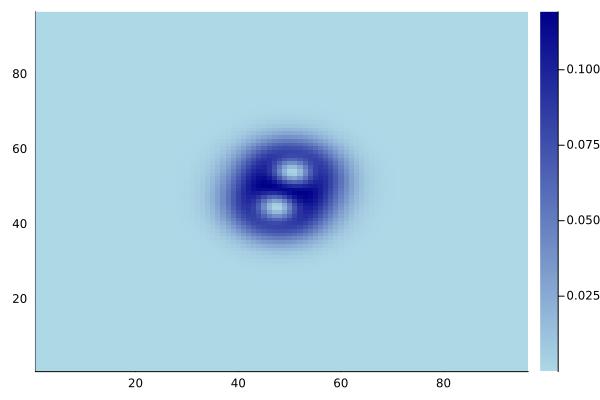

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)